In [17]:
# mude pelo caminho onde se encontram os csv
folder_path = '/Users/carolinabarcellos/saidas/'

In [10]:
%pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 3.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 4.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 3.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd

In [19]:
df_nulos_salas = pd.read_csv(folder_path + 'quantidade_nulos_sala.csv')
df_nulos_complexo = pd.read_csv(folder_path + 'quantidade_nulos_complexo.csv')

In [23]:
%pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 2.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.6/254.6 kB 2.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 1.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [45]:
df_nulos_filmes = pd.read_csv(folder_path + 'quantidade_nulos.csv')

<Axes: title={'center': 'Quantidade de valores nulos por coluna em complexo'}, ylabel='coluna'>

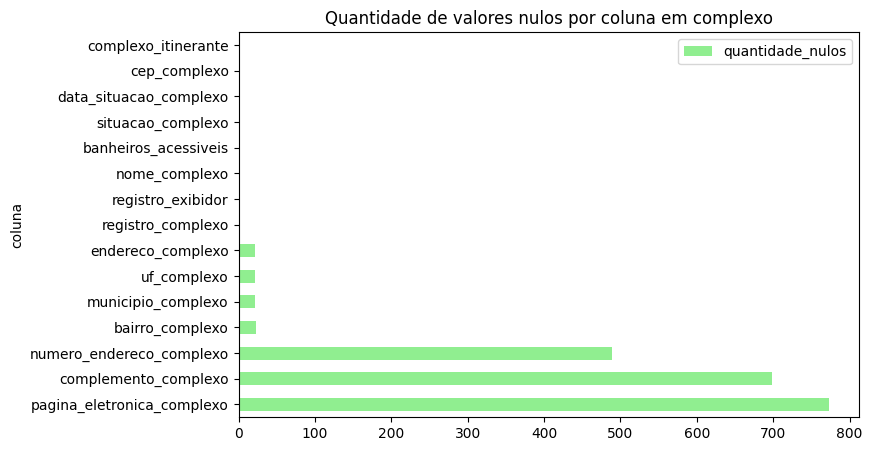

In [41]:
df_nulos_complexo.plot(
    kind='barh',
    x='coluna',
    y='quantidade_nulos',
    color='lightgreen',
    figsize=(8, 5),
    title='Quantidade de valores nulos por coluna em complexo',
)


<Axes: title={'center': 'Quantidade de valores nulos por coluna em sala'}, ylabel='coluna'>

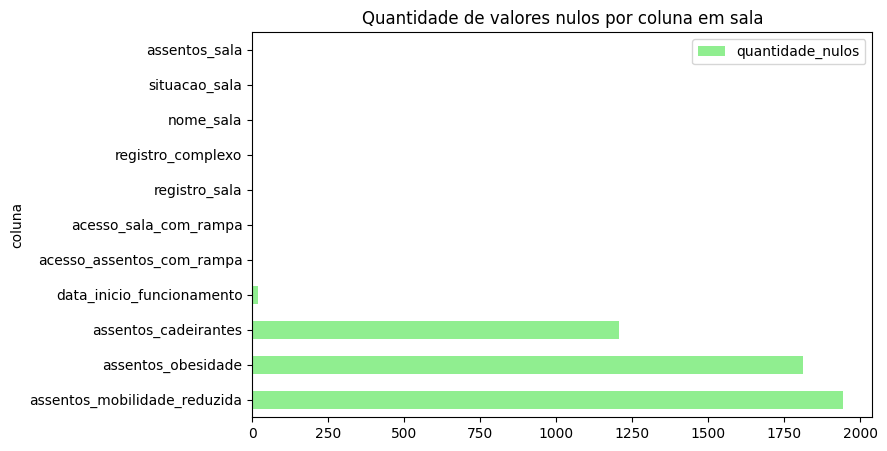

In [42]:
df_nulos_salas.plot(
    kind='barh',
    x='coluna',
    y='quantidade_nulos',
    color='lightgreen',
    title='Quantidade de valores nulos por coluna em sala',
    figsize=(8, 5)
)


In [35]:
df_nulos_exibidor = pd.read_csv(folder_path + 'quantidade_nulos_exibidor.csv')
df_nulos_grupo_exibidor = pd.read_csv(folder_path + 'quantidade_nulos_grupo_exibidor.csv')
df_nulos_distribuidora = pd.read_csv(folder_path + 'quantidade_nulos_distribuidora.csv')
df_nulos_protocolo = pd.read_csv(folder_path + 'quantidade_nulos_protocolo.csv')
df_nulos_secao = pd.read_csv(folder_path + 'quantidade_nulos_secao.csv')

<Axes: title={'center': 'Quantidade de valores nulos por coluna em exibidor'}, ylabel='coluna'>

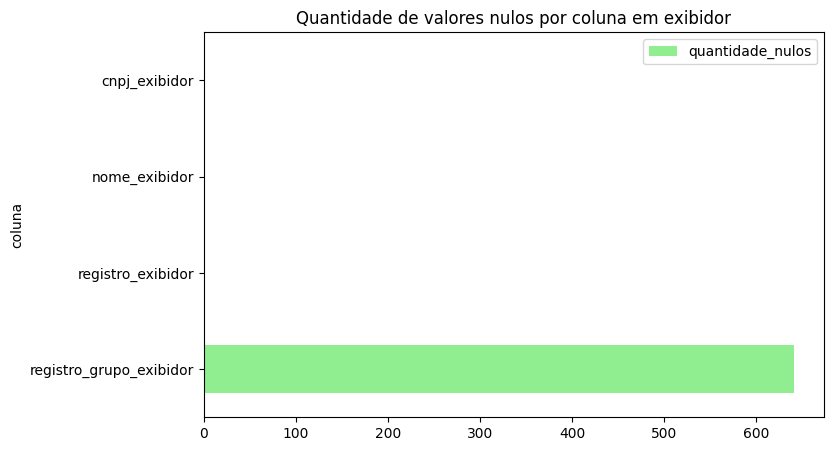

In [44]:
df_nulos_exibidor.plot(
    kind='barh',
    x='coluna',
    y='quantidade_nulos',
    color='lightgreen',
    title='Quantidade de valores nulos por coluna em exibidor',
    figsize=(8, 5)
)


<Axes: title={'center': 'Quantidade de valores nulos por coluna em filme'}, ylabel='coluna'>

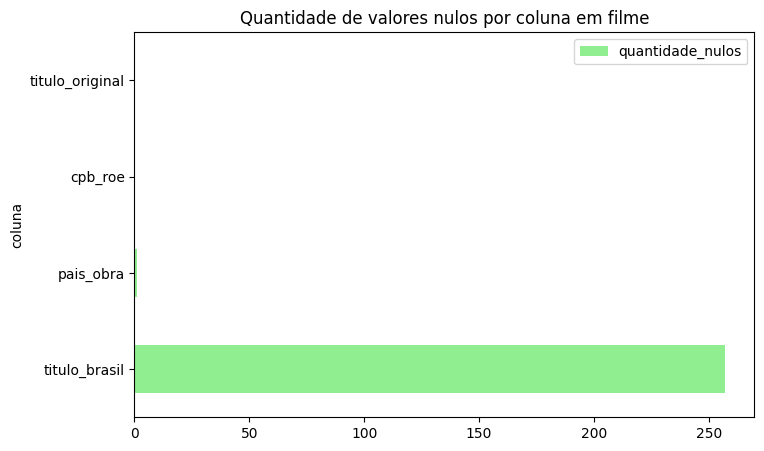

In [52]:
df_nulos_filmes=df_nulos_filmes.sort_values(by ='quantidade_nulos', ascending=False)
df_nulos_filmes.plot(
    kind='barh',
    x='coluna',
    y='quantidade_nulos',
    color='lightgreen',
    title='Quantidade de valores nulos por coluna em filme',
    figsize=(8, 5)
)

Identificando Outliers

In [53]:
df_salas_assentos = pd.read_csv(folder_path + 'sala_assentos.csv')

In [57]:
media_assentos_sala=df_salas_assentos.get('assentos_sala').mean()
media_assentos_sala

np.float64(190.59049773755657)

In [266]:
# Calcular os quartis e IQR
q1 = df_salas_assentos['assentos_sala'].quantile(0.25)
q3 = df_salas_assentos['assentos_sala'].quantile(0.75)
iqr = q3 - q1

# Definir o fator (ajuste conforme desejar)
fator = 8

# Calcular os limites
limite_inferior = q1 - fator * iqr
limite_superior = q3 + fator * iqr

# Criar a coluna indicando se é outlier
df_salas_assentos['outlier'] = (
    (df_salas_assentos['assentos_sala'] < limite_inferior) |
    (df_salas_assentos['assentos_sala'] > limite_superior)
)

# Criar um dataframe só com os outliers
df_outliers_salas = df_salas_assentos[df_salas_assentos['outlier']].copy()

# Visualizar
df_outliers_salas=df_outliers_salas.drop(columns='outlier')



In [181]:
%pip install jinja2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 kB 1.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [267]:
df_outliers_salas.style.set_caption("Outliers - Quantidade de Assentos por Sala")\
    .set_table_styles([
        {'selector': 'caption',
         'props': [('color', 'black'),
                   ('font-size', '16px'),
                   ('text-align', 'center'),
                   ('background-color', 'white')]},
        {'selector': 'th, td',
         'props': [('background-color', 'white'),
                   ('color', 'black'),
                   ('border', '1px solid black'),
                   ('text-align', 'left')]}
    ])\
    .set_properties(**{'background-color': 'white', 'color': 'black'})


,nome_sala,assentos_sala
0,SUPER CINE ESPAÇO DAS AMÉRICAS DRIVE IN,3000
1,CINE DRIVEIN,2000
2,SÃO LEO BOURBON 01,1693
3,CINE 9 DE ABRIL,1535
4,SÃO LUIZ,1219
5,CENTRO CULTURAL SESC LUIZ SEVERIANO RIBEIRO,1200
6,SÃO LUIZ,1181
7,CINE ALVORADA,1180
8,CINETEATRO SÃO LUIZ,1050
9,IPIRANGA I,1030


In [66]:
df_complexos_uf = pd.read_csv(folder_path + 'complexos_por_uf.csv')

In [268]:
# Calcular os quartis e IQR
q1 = df_complexos_uf['count'].quantile(0.25)
q3 = df_complexos_uf['count'].quantile(0.75)
iqr = q3 - q1

# Definir o fator (ajuste conforme desejar)
fator = 1.5

# Calcular os limites
limite_inferior = q1 - fator * iqr
limite_superior = q3 + fator * iqr

# Criar a coluna indicando se é outlier
df_complexos_uf['outlier'] = (
    (df_complexos_uf['count'] < limite_inferior) |
    (df_complexos_uf['count'] > limite_superior)
)

# Criar um dataframe só com os outliers
df_outliers_complexos_uf = df_complexos_uf[df_complexos_uf['outlier']].copy()

# Visualizar
df_outliers_complexos_uf=df_outliers_complexos_uf.drop(columns='outlier')



In [269]:
df_outliers_complexos_uf.style.set_caption("Outliers - Quantidade de Complexos por UF")\
    .set_table_styles([
        {'selector': 'caption',
         'props': [('color', 'black'),
                   ('font-size', '16px'),
                   ('text-align', 'center'),
                   ('background-color', 'white')]},
        {'selector': 'th, td',
         'props': [('background-color', 'white'),
                   ('color', 'black'),
                   ('border', '1px solid black'),
                   ('text-align', 'left')]}
    ])\
    .set_properties(**{'background-color': 'white', 'color': 'black'})


,uf_complexo,count
0,SP,529
1,RJ,216
2,MG,188


In [71]:
df_filme_publico= pd.read_csv(folder_path + 'filme_publico.csv')

In [150]:
df_filme_publico.get('publico_total').mean()

np.float64(186736.65547445256)

In [260]:
# Calcular os quartis e IQR
q1 = df_filme_publico['publico_total'].quantile(0.25)
q3 = df_filme_publico['publico_total'].quantile(0.75)
iqr = q3 - q1

# Definir o fator (ajuste conforme desejar)
fator = 50

# Calcular os limites
limite_inferior = q1 - fator * iqr
limite_superior = q3 + fator * iqr

# Criar a coluna indicando se é outlier
df_filme_publico['outlier'] = (
    (df_filme_publico['publico_total'] < limite_inferior) |
    (df_filme_publico['publico_total'] > limite_superior)
)

# Criar um dataframe só com os outliers
df_outliers_filmes = df_filme_publico[df_filme_publico['outlier']].copy()

# Visualizar
df_outliers_filmes=df_outliers_filmes.drop(columns='outlier')



In [261]:
df_outliers_filmes.head(15).style.set_caption("Outliers - Público Total por Filme")\
    .set_table_styles([
        {'selector': 'caption',
         'props': [('color', 'black'),
                   ('font-size', '16px'),
                   ('text-align', 'center'),
                   ('background-color', 'white')]},
        {'selector': 'th, td',
         'props': [('background-color', 'white'),
                   ('color', 'black'),
                   ('border', '1px solid black'),
                   ('text-align', 'left')]}
    ])\
    .set_properties(**{'background-color': 'white', 'color': 'black'})

,titulo_original,publico_total
0,INSIDE OUT 2,22438049
1,DESPICABLE ME 4,7919873
2,MOANA 2,7916241
3,DEADPOOL & WOLVERINE,7450522
4,AINDA ESTOU AQUI,3043422
5,THE FORGE,3001175
6,IT ENDS WITH US,2954050
7,KINGDOM OF THE PLANET OF THE APES,2912326
8,VENOM: THE LAST DANCE,2603493
9,AQUAMAN AND THE LOST KINGDOM,2493653


In [88]:
df_publico_distribuidoras= pd.read_csv(folder_path + 'publico_distribuidoras.csv')

In [262]:
# Calcular os quartis e IQR
q1 = df_publico_distribuidoras['publico_total'].quantile(0.25)
q3 = df_publico_distribuidoras['publico_total'].quantile(0.75)
iqr = q3 - q1

# Definir o fator (ajuste conforme desejar)
fator = 5

# Calcular os limites
limite_inferior = q1 - fator * iqr
limite_superior = q3 + fator * iqr

# Criar a coluna indicando se é outlier
df_publico_distribuidoras['outlier'] = (
    (df_publico_distribuidoras['publico_total'] < limite_inferior) |
    (df_publico_distribuidoras['publico_total'] > limite_superior)
)

# Criar um dataframe só com os outliers
df_outliers_distribuidoras_publico = df_publico_distribuidoras[df_publico_distribuidoras['outlier']].copy()

# Visualizar
df_outliers_distribuidoras_publico=df_outliers_distribuidoras_publico.drop(columns='outlier')

In [263]:
df_outliers_distribuidoras_publico.style.set_caption("Outliers -Público Total por Distribuidora")\
    .set_table_styles([
        {'selector': 'caption',
         'props': [('color', 'black'),
                   ('font-size', '16px'),
                   ('text-align', 'center'),
                   ('background-color', 'white')]},
        {'selector': 'th, td',
         'props': [('background-color', 'white'),
                   ('color', 'black'),
                   ('border', '1px solid black'),
                   ('text-align', 'left')]}
    ])\
    .set_properties(**{'background-color': 'white', 'color': 'black'})

,razao_social_distribuidora,publico_total
0,THE WALT DISNEY COMPANY (BRASIL) LTDA.,48762520
1,WARNER BROS. (SOUTH) INC.,30385038
2,COLUMBIA TRISTAR FILMES DO BRASIL LTDA,17685261
3,PARAMOUNT PICTURES BRASIL DISTRIBUIDORA DE FILMES LTDA,8404587
4,SM DISTRIBUIDORA DE FILMES LTDA,7884111
5,DIAMOND FILMS DO BRASIL PRODUÇÃO E DISTRIBUIÇÃO AUDIOVISUAL LTDA.,4507384
6,WMIX DISTRIBUIDORA LTDA.,3801609
7,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,1934258
8,H2O DISTRIBUIDORA DE FILMES LTDA,1754354
9,UNITED CINEMAS INTERNATIONAL BRASIL LTDA.,545233


In [90]:
df_filmes_distribuidoras= pd.read_csv(folder_path + 'filme_distribuidoras.csv')

In [264]:
# Calcular os quartis e IQR
q1 = df_filmes_distribuidoras['quantidade_filmes'].quantile(0.25)
q3 = df_filmes_distribuidoras['quantidade_filmes'].quantile(0.75)
iqr = q3 - q1

# Definir o fator (ajuste conforme desejar)
fator = 5

# Calcular os limites
limite_inferior = q1 - fator * iqr
limite_superior = q3 + fator * iqr

# Criar a coluna indicando se é outlier
df_filmes_distribuidoras['outlier'] = (
    ( df_filmes_distribuidoras['quantidade_filmes'] < limite_inferior) |
    ( df_filmes_distribuidoras['quantidade_filmes'] > limite_superior)
)

# Criar um dataframe só com os outliers
df_outliers_distribuidoras_filmes= df_filmes_distribuidoras[df_filmes_distribuidoras['outlier']].copy()

# Visualizar
df_outliers_distribuidoras_filmes=df_outliers_distribuidoras_filmes.drop(columns='outlier')

In [270]:
df_outliers_distribuidoras_filmes.style.set_caption("Outliers - Total de Filmes por Distribuidora")\
    .set_table_styles([
        {'selector': 'caption',
         'props': [('color', 'black'),
                   ('font-size', '16px'),
                   ('text-align', 'center'),
                   ('background-color', 'white')]},
        {'selector': 'th, td',
         'props': [('background-color', 'white'),
                   ('color', 'black'),
                   ('border', '1px solid black'),
                   ('text-align', 'left')]}
    ])\
    .set_properties(**{'background-color': 'white', 'color': 'black'})

,razao_social_distribuidora,quantidade_filmes
0,WARNER BROS. (SOUTH) INC.,573741
1,THE WALT DISNEY COMPANY (BRASIL) LTDA.,419396
2,COLUMBIA TRISTAR FILMES DO BRASIL LTDA,297812
3,SM DISTRIBUIDORA DE FILMES LTDA,204179
4,PARAMOUNT PICTURES BRASIL DISTRIBUIDORA DE FILMES LTDA,146848
5,WMIX DISTRIBUIDORA LTDA.,137575
6,DIAMOND FILMS DO BRASIL PRODUÇÃO E DISTRIBUIÇÃO AUDIOVISUAL LTDA.,119300
7,H2O DISTRIBUIDORA DE FILMES LTDA,33955
8,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,33235
9,O2 PRODUÇÕES ARTÍSTICAS E CINEMATOGRÁFICAS LTDA.,14949


Correlação entre número de filmes e público por distribuidora

In [94]:
df_merged = pd.merge(
    df_filmes_distribuidoras, 
    df_publico_distribuidoras, 
    on='razao_social_distribuidora'
)


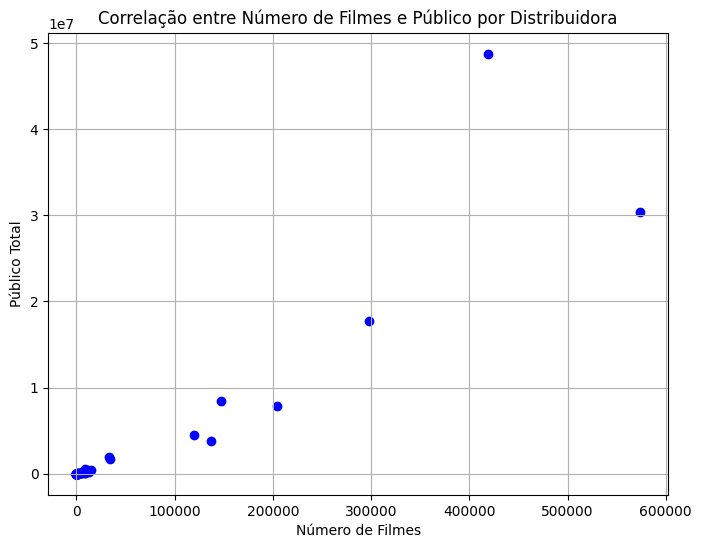

In [274]:
plt.figure(figsize=(8,6))
plt.scatter(
    df_merged['quantidade_filmes'], 
    df_merged['publico_total'], 
    color='blue'
)
plt.title('Correlação entre Número de Filmes e Público por Distribuidora')
plt.xlabel('Número de Filmes')
plt.ylabel('Público Total')
plt.grid(True)
plt.show()

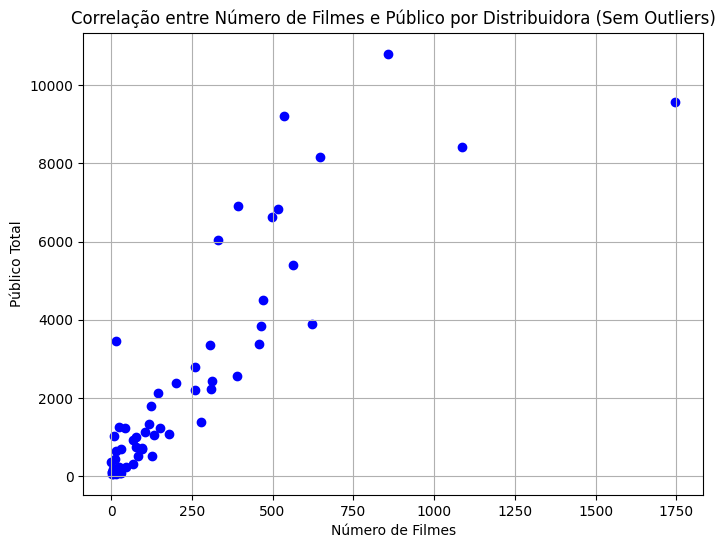

In [272]:
import numpy as np
# Função para remover outliers com base no IQR
def remover_outliers(df, coluna, fator=1.5):
    q1 = df[coluna].quantile(0.25)
    q3 = df[coluna].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - fator * iqr
    limite_superior = q3 + fator * iqr
    filtro = (df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)
    return df[filtro]

# Aplicar a remoção de outliers nas duas colunas
df_sem_outliers = remover_outliers(df_merged, 'quantidade_filmes')
df_sem_outliers = remover_outliers(df_sem_outliers, 'publico_total')

# Plotar gráfico sem outliers
plt.figure(figsize=(8,6))
plt.scatter(
    df_sem_outliers['quantidade_filmes'], 
    df_sem_outliers['publico_total'], 
    color='blue'
)
plt.title('Correlação entre Número de Filmes e Público por Distribuidora (Sem Outliers)')
plt.xlabel('Número de Filmes')
plt.ylabel('Público Total')
plt.grid(True)
plt.show()


In [111]:
import sys
!{sys.executable} -m pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 6.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 6.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 3.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


In [112]:
import sklearn
print(sklearn.__version__)

1.7.0


In [113]:
from sklearn.linear_model import LinearRegression

Equação da reta: y = 7.87 * x + 508.04
R² (coeficiente de determinação): 0.7563


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


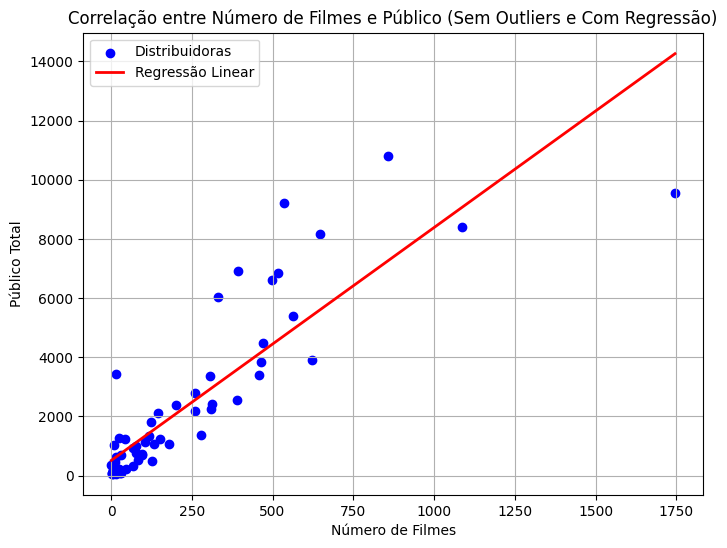

In [273]:
import numpy as np
import matplotlib.pyplot as plt

# Definir as variáveis
X = df_sem_outliers[['quantidade_filmes']]  # precisa ser 2D
y = df_sem_outliers['publico_total']

# Criar e ajustar o modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Coeficientes
coef_angular = modelo.coef_[0]
intercepto = modelo.intercept_

print(f'Equação da reta: y = {coef_angular:.2f} * x + {intercepto:.2f}')
print(f'R² (coeficiente de determinação): {modelo.score(X, y):.4f}')

# Gerar valores para a linha de regressão
x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_vals = modelo.predict(x_vals)

# Plotar os pontos e a linha de regressão
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='Distribuidoras')
plt.plot(x_vals, y_vals, color='red', linewidth=2, label='Regressão Linear')
plt.title('Correlação entre Número de Filmes e Público (Sem Outliers e Com Regressão)')
plt.xlabel('Número de Filmes')
plt.ylabel('Público Total')
plt.legend()
plt.grid(True)
plt.show()


Acessibilidade

In [120]:
df_banheiros_acessiveis= pd.read_csv(folder_path + 'banheiros_acessiveis.csv')
df_banheiros_acessiveis

,banheiros_acessiveis,quantidade
0,SIM,1116
1,NÃO,827


<Axes: title={'center': 'Complexos com banheiros acessíveis'}, xlabel='banheiros_acessiveis'>

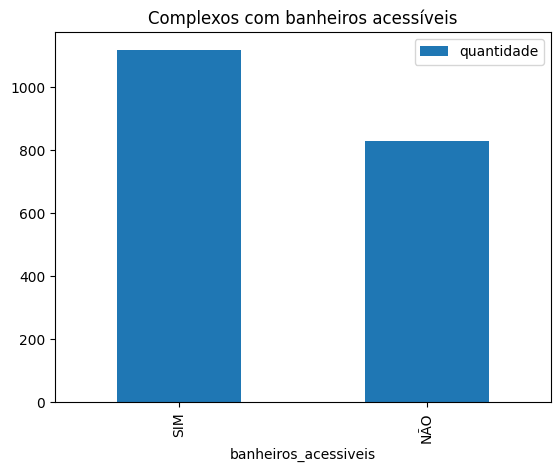

In [131]:
df_banheiros_acessiveis.plot(kind='bar',x='banheiros_acessiveis',y='quantidade', title="Complexos com banheiros acessíveis")

<Axes: title={'center': 'Salas com acesso aos assentos com rampa'}, xlabel='acesso_assentos_com_rampa'>

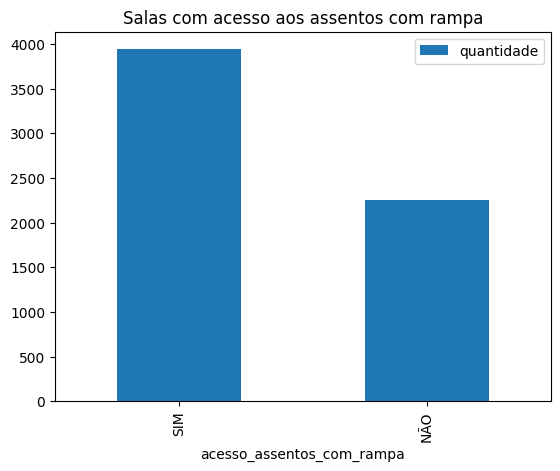

In [125]:
df_salas_acesso_assentos= pd.read_csv(folder_path + 'salas_acesso_assentos.csv')
df_salas_acesso_assentos.plot(kind='bar',x='acesso_assentos_com_rampa',y='quantidade', title="Salas com acesso aos assentos com rampa")

<Axes: title={'center': 'Salas com acesso com rampa'}, xlabel='acesso_sala_com_rampa'>

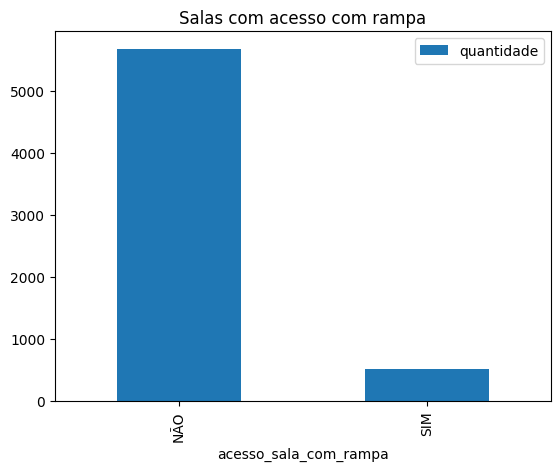

In [126]:
df_salas_acesso= pd.read_csv(folder_path + 'salas_acesso.csv')
df_salas_acesso.plot(kind='bar',x='acesso_sala_com_rampa',y='quantidade', title="Salas com acesso com rampa")

<Axes: title={'center': 'Situações dos complexos'}, ylabel='situacao_complexo'>

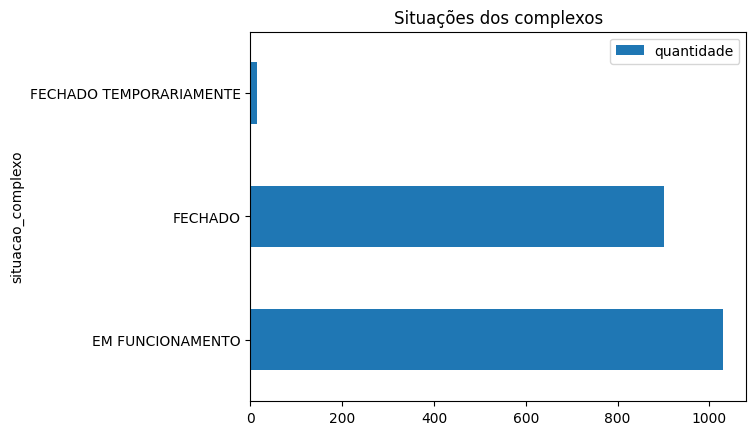

In [129]:
df_situacao_complexo= pd.read_csv(folder_path + 'situacao_complexo.csv')
df_situacao_complexo.plot(kind='barh',x='situacao_complexo',y='quantidade', title="Situações dos complexos")

In [244]:
# Ler o CSV
df_assentos_obesidade = pd.read_csv(folder_path + 'assentos_obesidade.csv')
df_assentos_obesidade=df_assentos_obesidade.sort_values(by='quantidade', ascending=False)
df_assentos_obesidade = df_assentos_obesidade.reset_index(drop=True)
df_assentos_obesidade['assentos_obesidade'] = df_assentos_obesidade['assentos_obesidade'].astype('Int64')

# E seleciona as colunas:
df_assentos_obesidade[['assentos_obesidade', 'quantidade']].head(10)

,assentos_obesidade,quantidade
0,<NA>,1812
1,1,1152
2,2,1066
3,0,636
4,3,530
5,4,485
6,5,112
7,6,109
8,8,50
9,10,42


In [245]:
df_assentos_obesidade[['assentos_obesidade', 'quantidade']].head(10).style.set_caption("Assentos Obesidade X Quantidade de Salas")\
    .set_table_styles([
        {'selector': 'caption',
         'props': [('color', 'black'),
                   ('font-size', '16px'),
                   ('text-align', 'center'),
                   ('background-color', 'white')]},
        {'selector': 'th, td',
         'props': [('background-color', 'white'),
                   ('color', 'black'),
                   ('border', '1px solid black'),
                   ('text-align', 'left')]}
    ])\
    .set_properties(**{'background-color': 'white', 'color': 'black'})

,assentos_obesidade,quantidade
0,,1812
1,1,1152
2,2,1066
3,0,636
4,3,530
5,4,485
6,5,112
7,6,109
8,8,50
9,10,42


In [246]:
# Ler o CSV
df_assentos_cadeirante = pd.read_csv(folder_path + 'assentos_cadeirante.csv')
df_assentos_cadeirante=df_assentos_cadeirante.sort_values(by='quantidade', ascending=False)
df_assentos_cadeirante = df_assentos_cadeirante.reset_index(drop=True)
df_assentos_cadeirante['assentos_cadeirantes'] =df_assentos_cadeirante['assentos_cadeirantes'].astype('Int64')

# E seleciona as colunas:
df_assentos_cadeirante[['assentos_cadeirantes', 'quantidade']]

,assentos_cadeirantes,quantidade
0,4,1528
1,2,1219
2,<NA>,1206
3,3,593
4,6,509
5,5,387
6,1,299
7,8,122
8,7,120
9,0,106


In [248]:
df_assentos_cadeirante[['assentos_cadeirantes', 'quantidade']].head(10).style.set_caption("Assentos Cadeirantes X Quantidade de salas")\
    .set_table_styles([
        {'selector': 'caption',
         'props': [('color', 'black'),
                   ('font-size', '16px'),
                   ('text-align', 'center'),
                   ('background-color', 'white')]},
        {'selector': 'th, td',
         'props': [('background-color', 'white'),
                   ('color', 'black'),
                   ('border', '1px solid black'),
                   ('text-align', 'left')]}
    ])\
    .set_properties(**{'background-color': 'white', 'color': 'black'})

,assentos_cadeirantes,quantidade
0,4,1528
1,2,1219
2,,1206
3,3,593
4,6,509
5,5,387
6,1,299
7,8,122
8,7,120
9,0,106


In [249]:
# Ler o CSV
df_assentos_mobilidade_reduzida = pd.read_csv(folder_path + 'assentos_mobilidade_reduzida.csv')
df_assentos_mobilidade_reduzida=df_assentos_mobilidade_reduzida.sort_values(by='quantidade', ascending=False)
df_assentos_mobilidade_reduzida = df_assentos_mobilidade_reduzida.reset_index(drop=True)
df_assentos_mobilidade_reduzida['assentos_mobilidade_reduzida'] = df_assentos_mobilidade_reduzida['assentos_mobilidade_reduzida'].astype('Int64')

# E seleciona as colunas:
df_assentos_mobilidade_reduzida[['assentos_mobilidade_reduzida', 'quantidade']]

,assentos_mobilidade_reduzida,quantidade
0,<NA>,1943
1,0,1227
2,1,1082
3,2,715
4,3,498
5,4,357
6,5,86
7,6,79
8,8,47
9,7,33


In [250]:
df_assentos_mobilidade_reduzida[['assentos_mobilidade_reduzida', 'quantidade']].head(10).style.set_caption("Assentos Mobilidade Reduzida X Quantidade de salas")\
    .set_table_styles([
        {'selector': 'caption',
         'props': [('color', 'black'),
                   ('font-size', '16px'),
                   ('text-align', 'center'),
                   ('background-color', 'white')]},
        {'selector': 'th, td',
         'props': [('background-color', 'white'),
                   ('color', 'black'),
                   ('border', '1px solid black'),
                   ('text-align', 'left')]}
    ])\
    .set_properties(**{'background-color': 'white', 'color': 'black'})

,assentos_mobilidade_reduzida,quantidade
0,,1943
1,0,1227
2,1,1082
3,2,715
4,3,498
5,4,357
6,5,86
7,6,79
8,8,47
9,7,33


<Axes: title={'center': 'Complexos Itinerantes'}, xlabel='complexo_itinerante'>

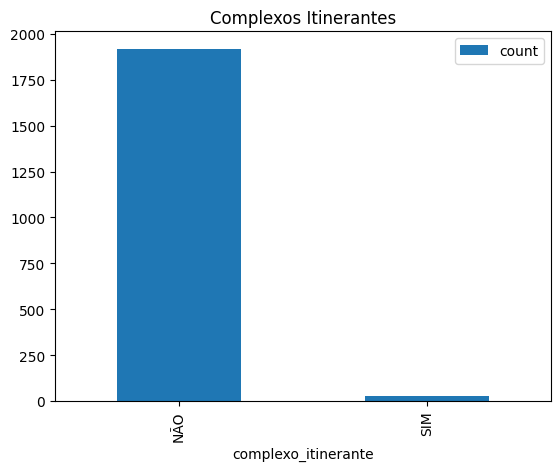

In [253]:
df_complexo_itinerante= pd.read_csv(folder_path + 'complexos_itinerantes_comparacao.csv')
df_complexo_itinerante.plot(kind='bar',x='complexo_itinerante',y='count', title="Complexos Itinerantes")